# Importing needed libraries/packages

In [1]:
from numpy.random import seed
seed(1)

import pandas as pd
import tensorflow as tf

tf.random.set_seed(2)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.0.0


In [2]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import glob, os, csv
from pathlib import Path
from matplotlib import rc

# Importing the data set and creating the columns of the data set for the model

In [3]:
# df = pd.read_csv('UDS3_v2.csv')
df = pd.read_csv('UDS5 (slope csv)(No 20s).csv')

# creating the columns of the formatted data set (149 columns (slope not current))
column_string = 'k, '

for x in range(149):
    column_string += 'x'+str(x)+', '
column_string = column_string[:-2]
column_names = column_string.split(', ')

print(column_names)

# adding all unique k values from the imported dataset to a list
k_values=df.k_.unique()
print('\n',len(k_values))

df

['k', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x135', 'x136', 'x137', 

,h,c,klog,f,d,k_,slope
0,1.056000,0.923537,-5.511511,0.000528,0.009472,0.004040,1.314991e-01
1,1.183141,0.940256,-5.511511,0.000528,0.009472,0.004040,1.056100e-01
2,1.310282,0.953683,-5.511511,0.000528,0.009472,0.004040,8.563298e-02
3,1.437423,0.964571,-5.511511,0.000528,0.009472,0.004040,7.002083e-02
4,1.564564,0.973473,-5.511511,0.000528,0.009472,0.004040,5.768093e-02
...,...,...,...,...,...,...,...
335245,19.333154,1.004650,-6.978178,0.000064,0.009936,0.000932,8.080000e-06
335246,19.466523,1.004651,-6.978178,0.000064,0.009936,0.000932,5.810000e-06
335247,19.599893,1.004651,-6.978178,0.000064,0.009936,0.000932,3.640000e-06
335248,19.733262,1.004652,-6.978178,0.000064,0.009936,0.000932,1.520000e-06


# Creating the dataframe 
### This dataframe will be the input for the model

In [4]:
k_values=df.k_.unique()
print('\n',len(k_values))

for index_k, k in enumerate(k_values):
    
#     if k != 0.01 and k != 0.1:

#         
        slope_values = df[(df['k_']==k)]['slope'].values.tolist()
#         print(slope_values)
    #         

        row = [k]
    #     print(row)


        for index_c, current in enumerate(slope_values):
            row.extend([slope_values[index_c]])
    #             print(row)



        row_df = pd.DataFrame([row], columns=column_names)



    #     if index_d == 0 and index_k == 0:
        if index_k == 0:
            final_df = row_df
        else:
            final_df = final_df.append(row_df)

# final_df

final_df = final_df.reset_index(drop = True)

final_df


 2250


,k,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148
0,0.004040,0.131499,0.105610,0.085633,0.070021,0.057681,0.047828,0.039887,0.033435,0.028151,...,-0.000423,-0.000419,-0.000415,-0.000411,-0.000407,-0.000403,-0.000399,-0.000396,-0.000392,-3.880890e-04
1,0.770000,-0.141661,-0.120873,-0.104190,-0.090625,-0.079465,-0.070187,-0.062398,-0.055804,-0.050177,...,-0.000758,-0.000747,-0.000738,-0.000728,-0.000718,-0.000709,-0.000700,-0.000691,-0.000682,-6.733230e-04
2,0.000346,0.153430,0.131380,0.113352,0.098472,0.086084,0.075688,0.066901,0.059425,0.053023,...,0.000259,0.000253,0.000248,0.000243,0.000238,0.000234,0.000229,0.000224,0.000220,2.157720e-04
3,0.000606,0.106500,0.092573,0.080952,0.071180,0.062907,0.055858,0.049815,0.044607,0.040094,...,0.000137,0.000133,0.000130,0.000126,0.000122,0.000119,0.000116,0.000112,0.000109,1.059770e-04
4,0.000286,0.534185,0.417997,0.334166,0.271635,0.223868,0.186696,0.157318,0.133790,0.114727,...,0.000293,0.000287,0.000281,0.000275,0.000270,0.000265,0.000260,0.000255,0.000250,2.448460e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.222000,-0.118667,-0.102461,-0.089256,-0.078370,-0.069303,-0.061680,-0.055217,-0.049694,-0.044940,...,-0.000752,-0.000742,-0.000732,-0.000723,-0.000713,-0.000704,-0.000695,-0.000686,-0.000677,-6.687850e-04
2246,0.000778,0.236747,0.196068,0.164110,0.138657,0.118142,0.101430,0.087685,0.076283,0.066747,...,0.000072,0.000069,0.000066,0.000063,0.000059,0.000057,0.000054,0.000051,0.000049,4.610000e-05
2247,0.000786,0.098219,0.085440,0.074755,0.065754,0.058122,0.051610,0.046021,0.041199,0.037018,...,0.000068,0.000065,0.000062,0.000059,0.000056,0.000054,0.000051,0.000048,0.000046,4.350000e-05
2248,0.000462,0.522221,0.408493,0.326322,0.265003,0.218163,0.181722,0.152934,0.129892,0.111233,...,0.000203,0.000198,0.000194,0.000189,0.000185,0.000180,0.000176,0.000172,0.000168,1.637430e-04


# Creating the training set and the test set

In [5]:
final_df = final_df.reset_index(drop = True)

# splitting the train and test set to an 80/20 ratio
# note: the output column is still included in the test AND the trainig set. It will be removed later

train_dataset = final_df.sample(frac=0.8, random_state=115)
test_dataset = final_df.drop(train_dataset.index)
# train_dataset

# removing the output value from the training set
# note: now train_dataset and test_dataset does not inlude the k values. 
y_train_k = train_dataset.pop('k')

# removing the output value from the testing set
y_test_k = test_dataset.pop('k')

# converting the training and testing k values to log10 values
y_train_k = (np.log10(y_train_k.to_frame())).squeeze()
y_test_k  = (np.log10(y_test_k.to_frame())).squeeze()

# stats of the train set. This is needed to normalize the training test (cell below)
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

# stats of the test set. This is needed to normalize the test test (cell below)
test_stats = test_dataset.describe()
test_stats = test_stats.transpose()
y_test_k

0      -2.393619
5      -0.170053
6      -3.333482
7      -0.069560
16     -0.147520
          ...   
2226   -4.095826
2235   -2.137869
2239   -3.489455
2241   -0.214670
2247   -3.104577
Name: k, Length: 450, dtype: float64

# Normalizing the input values (not including the k values) of both train and test sets. 

In [6]:
def norm(x):
    return(x-train_stats['mean']) / train_stats['std'] #standardize
#     return(x-train_stats['min']) / (train_stats['max'] -  train_stats['min']) #normalize
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Building the model

In [7]:
def build_model():
    model = keras.Sequential([
        layers.Dense(10, activation = tf.nn.relu, input_shape=[len(train_dataset.keys())]),#8 relu
        layers.Dense(10, activation = tf.nn.relu), #8 tanh
        layers.Dense(10, activation = tf.nn.relu),#uncommented
        layers.Dense(5, activation = tf.nn.relu),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss = 'mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    print(type(optimizer), "********")
    return model


model = build_model()

print(model.summary())

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> ********
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1500      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


array([[0.0848051 ],
       [0.59687996],
       [0.18411769],
       [0.21044825],
       [0.33801934],
       [0.5361285 ],
       [0.25805148],
       [0.13142388],
       [0.21809913],
       [0.06701668]], dtype=float32)

In [8]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100==0:
            print('.',end='')
EPOCHS=1000

history = model.fit(
    normed_train_data, y_train_k,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])

..........

In [9]:
normed_train_data.shape
y_train_k.shape

(1800,)

# Looking at evaluation metrics of the last 5 epochs. 

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.009430,0.059349,0.009430,0.004094,0.038265,0.004094,995
996,0.009690,0.060870,0.009690,0.003594,0.038797,0.003594,996
997,0.007194,0.050642,0.007194,0.005116,0.043612,0.005116,997
998,0.008030,0.055697,0.008030,0.004445,0.043512,0.004445,998
999,0.011504,0.063238,0.011504,0.008417,0.052197,0.008417,999


### W/O early stopping

<Figure size 432x288 with 0 Axes>

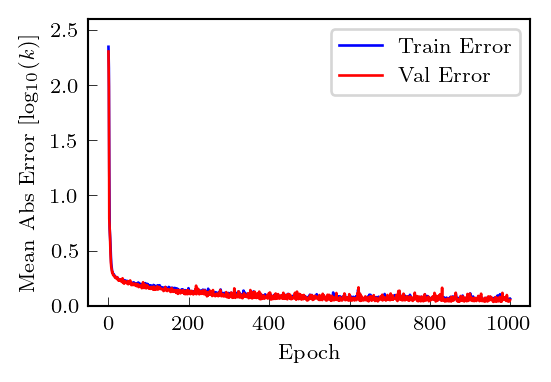

<Figure size 432x288 with 0 Axes>

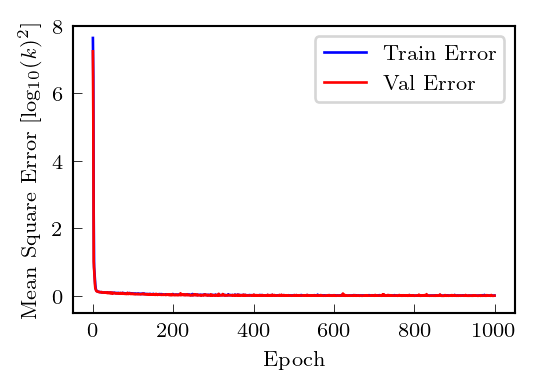

In [11]:
crimson = [(0.91, 0, 0.05)]
KU_blue = [(0.5, 0.5, 0.5)]

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    
    plt.figure()
    plt.figure(figsize=(3, 2), dpi = 190)
    plt.rc('text', usetex=True)
    plt.rc('font', family = 'serif')
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Mean Abs Error [log$_{10}(\it{k})$]', fontsize=8)
    plt.plot(hist['epoch'], hist['mae'],
             label = 'Train Error', c = 'blue', linewidth=1)
    plt.plot(hist['epoch'], hist['val_mae'],
             label = 'Val Error', c = 'red', linewidth=1)
    plt.legend(prop={'size': 8})
    plt.tick_params(direction = "in", width = 0.3, labelsize=8)
    plt.ylim([0,2.6])
    
    plt.figure()
    plt.figure(figsize=(3, 2), dpi = 190)
    plt.rc('text', usetex=True)
    plt.rc('font', family = 'serif')
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Mean Square Error [log$_{10}(\it{k})$$^2$]', fontsize=8)
    plt.plot(hist['epoch'], hist['mse'],
            label='Train Error', c = 'blue', linewidth=1)
    plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error', c = 'red', linewidth=1)
    plt.legend(prop={'size': 8})
    plt.tick_params(direction = "in", width = 0.3, labelsize=8)
    plt.ylim([-0.5,8])
    
plot_history(history)

loss, mae, mse = model.evaluate(normed_test_data, y_test_k, verbose=0)


Testing set Mean Abs Error:  0.06 k
Testing set Mean Squared Error:  0.01 k
Testing set loss:  0.01 k


<Figure size 432x288 with 0 Axes>

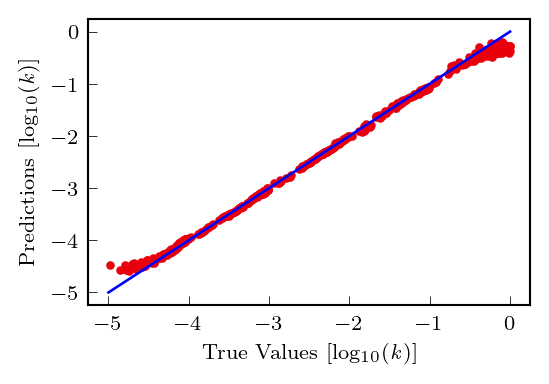

In [12]:
test_predictions = model.predict(normed_test_data).flatten()



plt.figure()
plt.figure(figsize=(3, 2), dpi = 190)
plt.scatter(y_test_k, test_predictions, c = crimson, s= 5)
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.xlabel(r'True Values [log$_{10}(\it{k})$]', fontsize=8)
plt.ylabel(r'Predictions [log$_{10}(\it{k})$]', fontsize=8)
plt.tick_params(direction = "in", width = 0.3, labelsize=8)
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([-10, plt.xlim()[3]])
# plt.ylim([-10, plt.ylim()[3]])
_ = plt.plot([0, -5], [0, -5], c = 'blue', linewidth = 1)

print('Testing set Mean Abs Error: {:5.2f} k'.format(mae))
print('Testing set Mean Squared Error: {:5.2f} k'.format(mse))
print('Testing set loss: {:5.2f} k'.format(loss))

# Creating the REAL data set to test the model on the real data.

In [13]:
# df = pd.read_csv('UDS3_v2.csv')
df = pd.read_csv('Trmd Test (-4 slope csv).csv')

# column_string = 'd, '
# column_string += 'f, '
column_string = 'k, '
# column_string += 'slope, '

for x in range(149):
    column_string += 'x'+str(x)+', '
column_string = column_string[:-2]
column_names = column_string.split(', ')

print(column_names)
df
k_values=df.k_.unique()
print('\n',len(k_values))

['k', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x135', 'x136', 'x137', 

In [14]:
k_values=df.k_.unique()
print('\n',len(k_values))

# for index_d, d in enumerate(d_values):
for index_k, k in enumerate(k_values):
    
#     if k != 0.01 and k != 0.1:

#         
        slope_values = df[(df['k_']==k)]['slope'].values.tolist()
#         print(slope_values)
    #         

        row = [k]
    #     print(row)


        for index_c, current in enumerate(slope_values):
            row.extend([slope_values[index_c]])
    #             print(row)



        row_df = pd.DataFrame([row], columns=column_names)



    #     if index_d == 0 and index_k == 0:
        if index_k == 0:
            final_df = row_df
        else:
            final_df = final_df.append(row_df)

# final_df

final_df = final_df.reset_index(drop = True)

final_df

# len(slope_values)


 4


,k,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148
0,-1.221849,-0.305470,-0.263184,-0.218825,-0.194891,-0.223514,-0.110392,-0.101868,-0.054907,-0.092980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,-1.522879,0.243177,0.148880,0.065415,0.015022,-0.029148,-0.061311,-0.085607,-0.116060,-0.131366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002109
2,-2.154902,0.517499,0.523880,0.509414,0.388283,0.308444,0.227985,0.192684,0.184104,0.121437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,-3.000000,0.301684,0.271179,0.284273,0.233989,0.206822,0.138693,0.122137,0.138504,0.086233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [15]:
test_dataset = final_df


y_test_k = test_dataset.pop('k')

# y_train_k = (np.log(y_train_k.to_frame())).squeeze()
# y_test_k  = (np.log(y_test_k.to_frame())).squeeze()

train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

test_stats = test_dataset.describe()
test_stats = test_stats.transpose()

# final_df.loc[:, 'k':'x20']
y_test_k

0   -1.221849
1   -1.522879
2   -2.154902
3   -3.000000
Name: k, dtype: float64

In [16]:
def norm(x):
    return(x-train_stats['mean']) / train_stats['std'] #standardize
#     return(x-train_stats['min']) / (train_stats['max'] -  train_stats['min']) #normalize

normed_test_data = norm(test_dataset)

# Testing the experimental data

<Figure size 432x288 with 0 Axes>

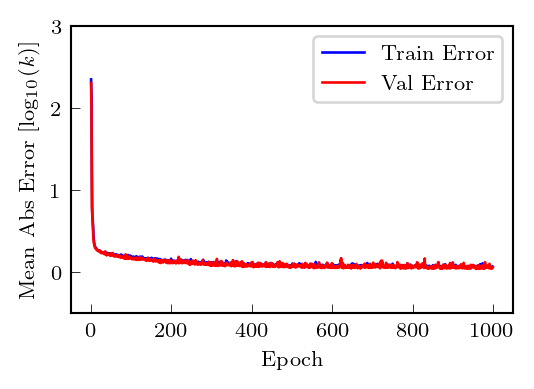

<Figure size 432x288 with 0 Axes>

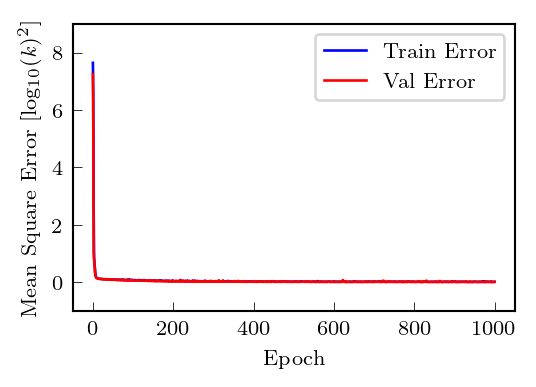

In [17]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    
    plt.figure()
    plt.figure(figsize=(3, 2), dpi = 190)
    plt.rc('text', usetex=True)
    plt.rc('font', family = 'serif')
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Mean Abs Error [log$_{10}(\it{k})$]', fontsize=8)
    plt.plot(hist['epoch'], hist['mae'],
             label = 'Train Error', c = 'blue', linewidth=1)
    plt.plot(hist['epoch'], hist['val_mae'],
             label = 'Val Error', c = 'red', linewidth=1)
    plt.legend(prop={'size': 8})
    plt.tick_params(direction = "in", width = 0.3, labelsize=8)
    plt.ylim([-0.5,3])

    plt.figure()
    plt.figure(figsize=(3, 2), dpi = 190)
    plt.rc('text', usetex=True)
    plt.rc('font', family = 'serif')
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Mean Square Error [log$_{10}(\it{k})$$^2$]', fontsize=8)
    plt.plot(hist['epoch'], hist['mse'],
            label='Train Error', c = 'blue', linewidth=1)
    plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error', c = 'red', linewidth=1)
    plt.legend(prop={'size': 8})
    plt.tick_params(direction = "in", width = 0.3, labelsize=8)
    plt.ylim([-1,9])
    
    
plot_history(history)


# model = build_model()

loss, mae, mse = model.evaluate(normed_test_data, y_test_k, verbose=0)


Testing set Mean Abs Error:  0.45 k
Testing set Mean Squared Error:  0.22 k
Testing set loss:  0.22 k


<Figure size 432x288 with 0 Axes>

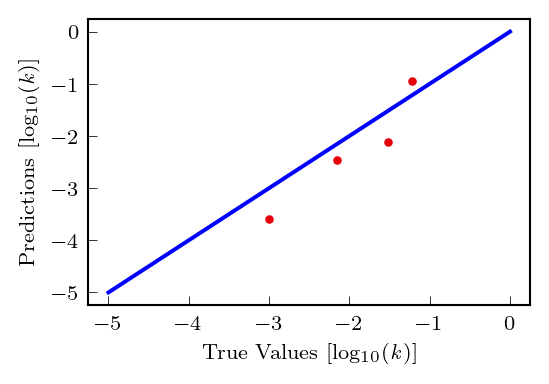

In [18]:
test_predictions = model.predict(normed_test_data).flatten()

plt.figure()
plt.figure(figsize=(3, 2), dpi = 190)
plt.scatter(y_test_k, test_predictions, c = crimson, s=5)
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.xlabel(r'True Values [log$_{10}(\it{k})$]', fontsize=8)
plt.ylabel(r'Predictions [log$_{10}(\it{k})$]', fontsize=8)
plt.tick_params(direction = "in", width = 0.3, labelsize=8)
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([-10, plt.xlim()[3]])
# plt.ylim([-10, plt.ylim()[3]])
_ = plt.plot([0, -5], [0, -5],c = 'blue')

print('Testing set Mean Abs Error: {:5.2f} k'.format(mae))
print('Testing set Mean Squared Error: {:5.2f} k'.format(mse))
print('Testing set loss: {:5.2f} k'.format(loss))


### With early stopping

In [19]:
# model = build_model()

# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# history = model.fit(normed_train_data, y_train_k, epochs=EPOCHS,
#                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

# plot_history(history)

# loss, mae, mse = model.evaluate(normed_test_data, y_test_k, verbose=0)

In [20]:
# test_predictions = model.predict(normed_test_data).flatten()

# plt.scatter(y_test_k, test_predictions)
# plt.xlabel('True Values [k]')
# plt.ylabel('Predictions [k]')
# # plt.axis('equal')
# # plt.axis('square')
# # plt.xlim([-10, plt.xlim()[3]])
# # plt.ylim([-10, plt.ylim()[3]])
# _ = plt.plot([0, -8], [0, -8])

# print('Testing set Mean Abs Error: {:5.2f} k'.format(mae))
# print('Testing set Mean Squared Error: {:5.2f} k'.format(mse))
# print('Testing set loss: {:5.2f} k'.format(loss))

In [21]:
# error = test_predictions-y_test_k
# plt.hist(error, bins = 10)
# plt.xlabel('Prediction Error [k]')
# _ = plt.ylabel('Count')